In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

import seaborn as sns

data = pd.read_csv('./data/5차완료.csv')

data.columns = ['횡단보도ID', '교차로', '신호등', '어린이집_초등학교_유무',
                '불법주정차수', '무인단속카메라', '표지판', '스마트횡단보도',
                '지하철역_승하차인구', '버스정류장_승하차인구', '카페수', '카페_100', '교통사고위험수준',
                '사고건수', '학원수', '사고위험지수']

df = data[['교차로', '신호등', '어린이집_초등학교_유무',
           '불법주정차수', '무인단속카메라', '표지판',
           '지하철역_승하차인구', '버스정류장_승하차인구', '카페수',
           '교통사고위험수준']]

train, test = train_test_split(df, random_state = 42)
train_X = train.drop('교통사고위험수준', axis = 1)
train_y = train['교통사고위험수준']
test_X = test.drop('교통사고위험수준', axis = 1)
test_y = test['교통사고위험수준']

print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

import seaborn as sns

data = pd.read_csv('./data/5차완료.csv')

data.columns = ['횡단보도ID', '교차로', '신호등', '어린이집_초등학교_유무',
                '불법주정차수', '무인단속카메라', '표지판', '스마트횡단보도',
                '지하철역_승하차인구', '버스정류장_승하차인구', '카페수', '카페_100', '교통사고위험수준',
                '사고건수', '학원수', '사고위험지수']

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442 entries, 0 to 2441
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   횡단보도ID        2442 non-null   object 
 1   교차로           2442 non-null   int64  
 2   신호등           2442 non-null   int64  
 3   어린이집_초등학교_유무  2442 non-null   int64  
 4   불법주정차수        2442 non-null   float64
 5   무인단속카메라       2442 non-null   int64  
 6   표지판           2442 non-null   int64  
 7   스마트횡단보도       2442 non-null   int64  
 8   지하철역_승하차인구    2442 non-null   float64
 9   버스정류장_승하차인구   2442 non-null   float64
 10  카페수           2442 non-null   float64
 11  카페_100        2442 non-null   float64
 12  교통사고위험수준      2442 non-null   int64  
 13  사고건수          2442 non-null   int64  
 14  학원수           2442 non-null   float64
 15  사고위험지수        2442 non-null   float64
dtypes: float64(7), int64(8), object(1)
memory usage: 305.4+ KB


In [3]:
data

,횡단보도ID,교차로,신호등,어린이집_초등학교_유무,불법주정차수,무인단속카메라,표지판,스마트횡단보도,지하철역_승하차인구,버스정류장_승하차인구,카페수,카페_100,교통사고위험수준,사고건수,학원수,사고위험지수
0,06-0000036765,0,0,0,0.000000,0,0,0,136.735043,0.520320,0.0,0.0,0,0,0.0,2.800645
1,06-0000036763,0,0,1,0.000000,0,0,0,136.735043,0.560164,0.0,0.0,0,2,0.0,15.375917
2,06-0000036761,0,0,1,0.000000,0,0,0,136.735043,0.650399,0.0,0.0,0,2,0.0,15.430410
3,06-0000036762,0,0,1,0.000000,0,0,0,136.735043,0.650399,0.0,0.0,0,0,0.0,15.430410
4,06-0000038099,0,0,1,0.000000,0,0,0,109.388034,0.872520,0.0,0.0,1,4,0.0,15.010637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2437,06-0000011870,1,1,1,0.761644,1,1,0,876.667350,13.029268,0.0,1.0,1,6,0.0,46.704422
2438,06-0000003239,1,1,1,2.627397,1,10,0,876.667350,3.624228,0.0,1.0,1,3,0.0,43.315436
2439,06-0000012023,1,0,1,2.627397,1,0,0,876.667350,3.624228,0.0,1.0,1,5,0.0,36.524736
2440,06-0000012024,1,0,1,2.627397,1,0,0,876.667350,2.899382,0.0,1.0,2,12,0.0,36.086998


Accuracy for Random Forests is 0.6939443535188216


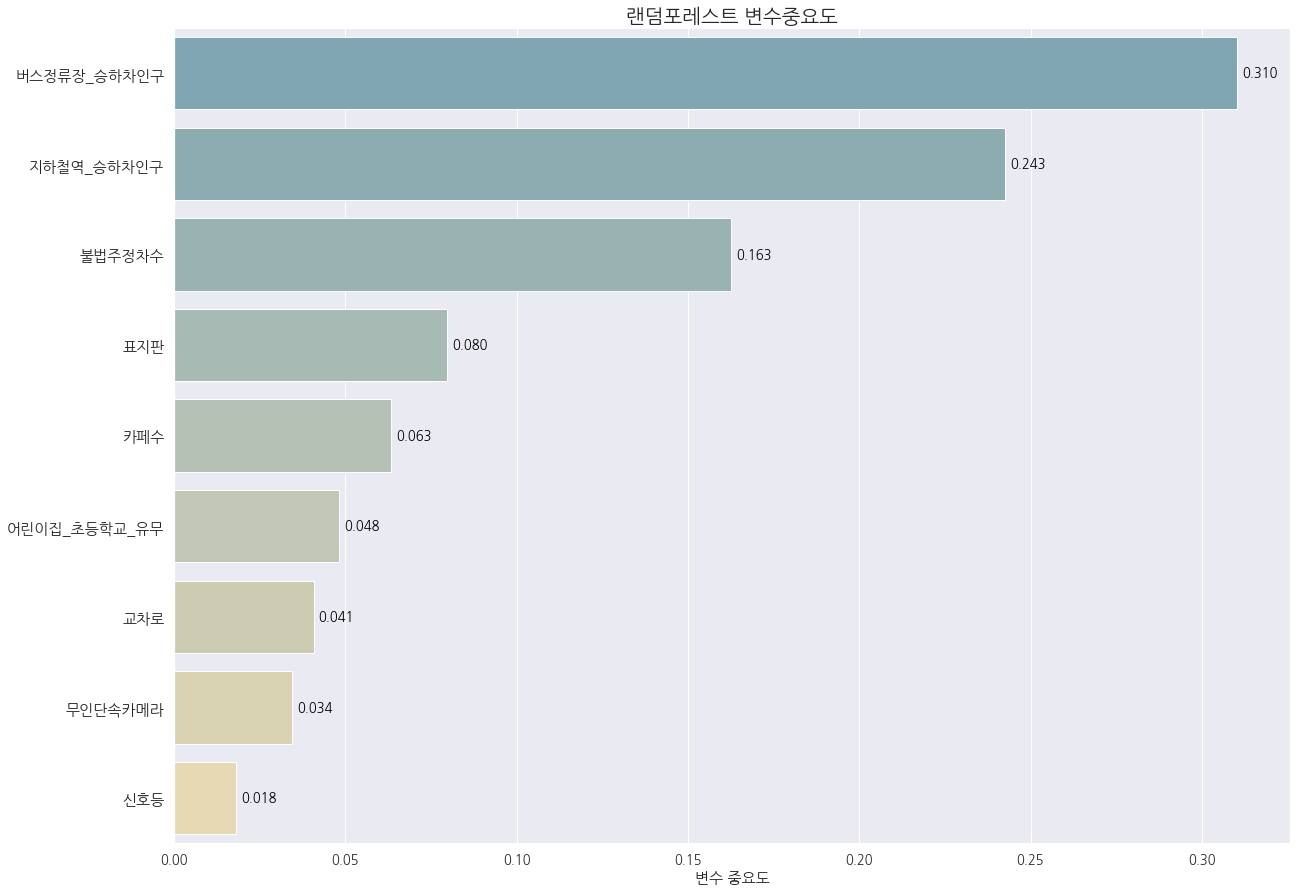

In [69]:
### RandomForest Classification Model
rf = RandomForestClassifier()
rf.fit(train_X, train_y)
prediction_rf = rf.predict(test_X)
print('Accuracy for Random Forests is', metrics.accuracy_score(prediction_rf, test_y))

# Feature Importance
ft_importance_value = rf.feature_importances_
ft_series = pd.Series(ft_importance_value, index = train_X.columns)
ft_sort = ft_series.sort_values(ascending = False)

# make plot
sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
g = sns.barplot(x = ft_sort, y = ft_sort.index, palette = "blend:#7AB,#EDA")
ax.set_title('랜덤포레스트 변수중요도', size = 20)
ax.set_xlabel('변수 중요도', size = 15)
plt.yticks(size = 15)
plt.xticks(size = 13)

for p in g.patches: 
    ax.annotate("%.3f" % p.get_width(),
                xy = (p.get_width(), p.get_y() + p.get_height() / 2),
                ha = 'left', va = 'center',
                size = 13, color = 'black', xytext = (5, 0),
                textcoords='offset points') 

plt.show()

In [79]:
import xgboost
xgb = xgboost.XGBClassifier(booster='gbtree', 
                    colsample_bylevel=0.9, 
                    colsample_bytree=0.8, 
                    gamma=0, 
                    max_depth=8, 
                    min_child_weight=3, 
                    n_estimators=50, 
                    nthread=4, 
                    objective='multi', 
                    random_state=42, 
                    silent= True)

xgb.fit(train_X, train_y, eval_set = [(test_X, test_y)], early_stopping_rounds = 50)

[16:46:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-merror:0.44190
Will train until validation_0-merror hasn't improved in 50 rounds.
[1]	validation_0-merror:0.39607
[2]	validation_0-merror:0.38953
[3]	validation_0-merror:0.36989
[4]	validation_0-merror:0.36007
[5]	validation_0-merror:0.36497
[6]	validation_0-merror:0.36334
[7]	validation_0-merror:0.34861
[8]	validation_0-merror:0.34370
[9]	validation_0-merror:0.34206
[10]	validation_0-merror:0.33388
[11]	validation_0-merror:0.32733
[12]	validation_0-merror:0.32897
[13]	validation_0-merror:0.31915
[14]	validation_0-merror:0.31588
[15]	validation_0-merror:0.31097
[16]	validation_0-merror:0.3109

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, silent=True, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

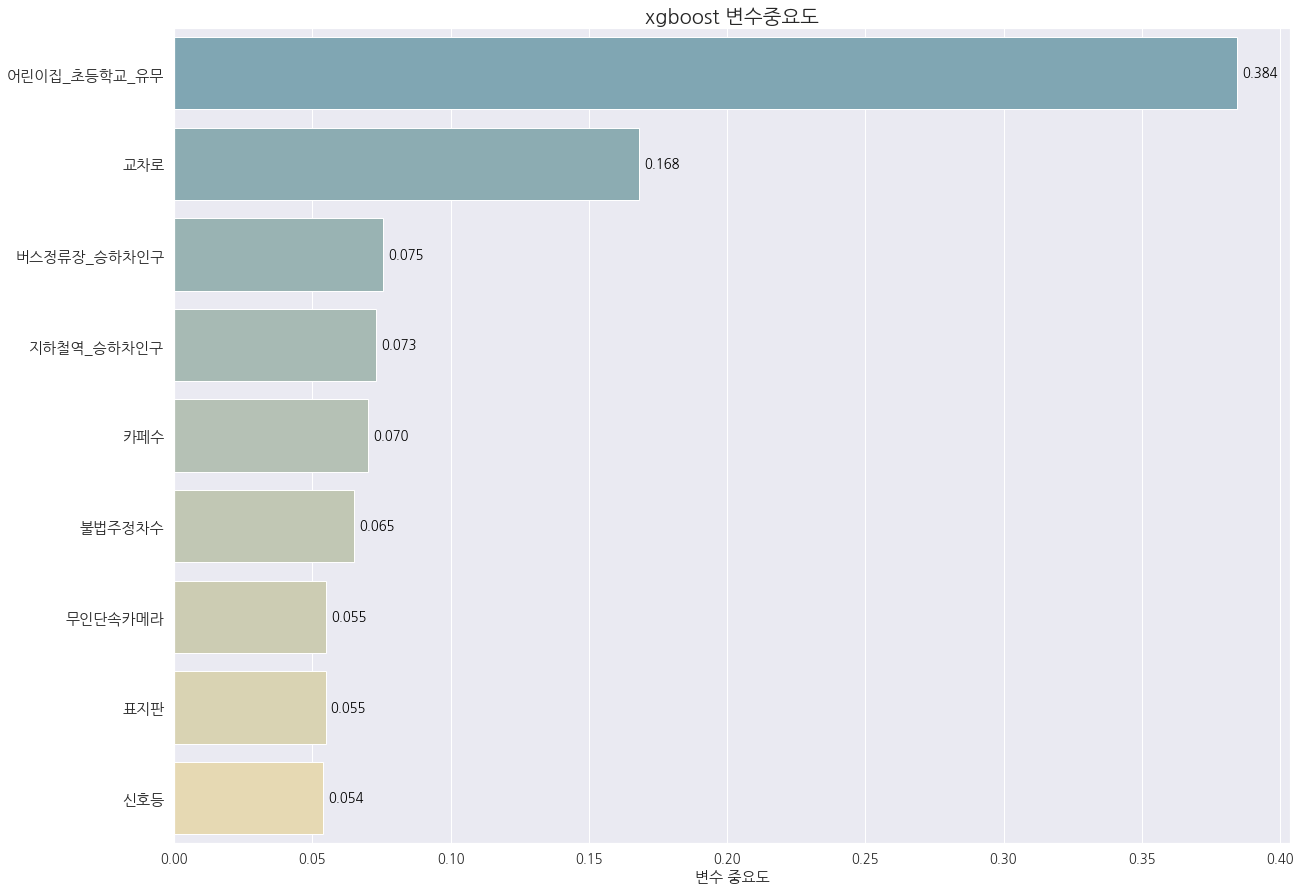

In [72]:
# Feature Importance
ft_importance_value = xgb.feature_importances_
ft_series = pd.Series(ft_importance_value, index = train_X.columns)
ft_sort = ft_series.sort_values(ascending = False)

# make plot
sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
g = sns.barplot(x = ft_sort, y = ft_sort.index, palette = "blend:#7AB,#EDA")
ax.set_title('xgboost 변수 중요도', size = 20)
ax.set_xlabel('변수 중요도', size = 15)
plt.yticks(size = 15)
plt.xticks(size = 13)

for p in g.patches: 
    ax.annotate("%.3f" % p.get_width(),
                xy = (p.get_width(), p.get_y() + p.get_height() / 2),
                ha = 'left', va = 'center',
                size = 13, color = 'black', xytext = (5, 0),
                textcoords='offset points') 

plt.show()

In [85]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'

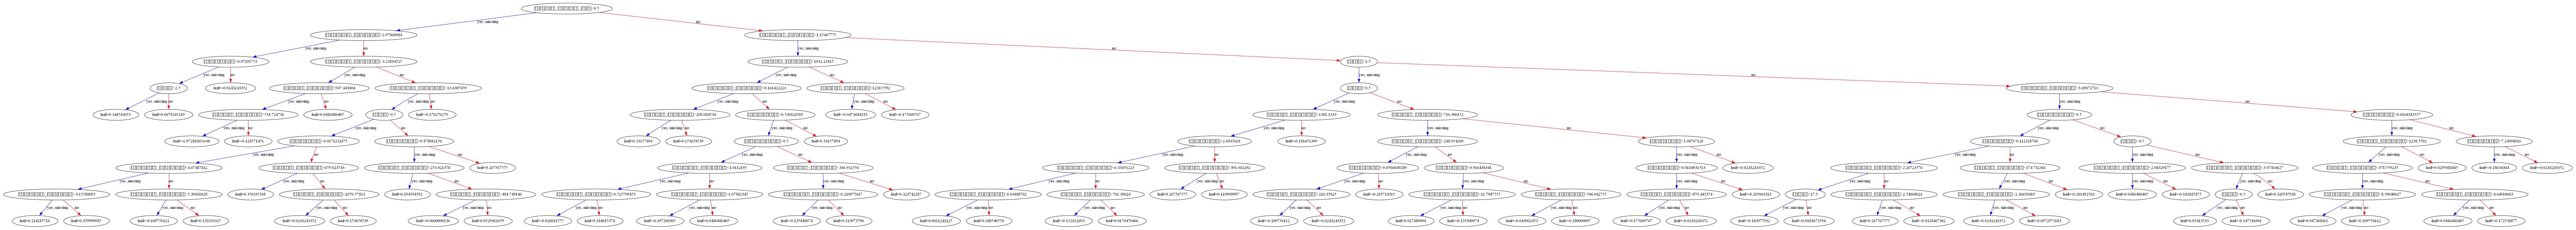

In [96]:
from xgboost import plot_tree

##set up the parameters
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
xgboost.plot_tree(xgb, num_trees = 0)
fig = plt.gcf()
fig.set_size_inches(150, 150)
plt.show()